In [1]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import average_precision_score

### Reading in the data

In [2]:
sales_data = pd.read_csv("wholesale-customers.csv")

In [3]:
sales_data.shape

(440, 8)

In [4]:
sales_data.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
sales_data.tail(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


### Train/Test Split 

In [6]:
X = sales_data.iloc[:, 2:]

In [7]:
X.head(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [8]:
X.tail(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125
439,2787,1698,2510,65,477,52


In [9]:
y = sales_data.iloc[:, [0]]

In [10]:
y.head(5)

,Channel
0,2
1,2
2,2
3,1
4,2


In [11]:
y.tail(5)

,Channel
435,1
436,1
437,2
438,1
439,1


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Development

#### Linear Support Vector Machine 

Perform stratified k-fold cross validation 

In [13]:
avg_precision_recall_scores = [0, 0, 0, 0, 0]
c_values = [0.0001, 0.001, 0.01, 0.1, 1.0]
num_iterations = 0

In [19]:
kf = StratifiedKFold(n_splits = 2) 

for train_index, test_index in kf.split(X,y):
    X_train_indexed, X_test_indexed = X.iloc[train_index, :], X.iloc[test_index, :] 
    y_train_indexed, y_test_indexed = y.iloc[train_index, :], y.iloc[test_index, :]
        
    for i in range(5):
        c_value = c_values[i]
        linear_svm_model = SVC(C = c_value, kernel = "linear")
        linear_svm_model.fit(X_train_indexed, y_train_indexed)
        y_score = linear_svm_model.decision_function(X_test_indexed)
        avg_precision_recall_score = average_precision_score(y_test_indexed, y_score)
        avg_precision_recall_scores[i] += avg_precision_recall_score
        num_iterations += 1 

/Users/ryanlim/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ryanlim/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ryanlim/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ryanlim/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [20]:
averaged_missed_precision_recall_scores = [(1 - avg_precision_recall_score) / num_iterations for avg_precision_recall_score in avg_precision_recall_scores]

Create a plot of the c (tuning parameter) and average missed precision-recall values

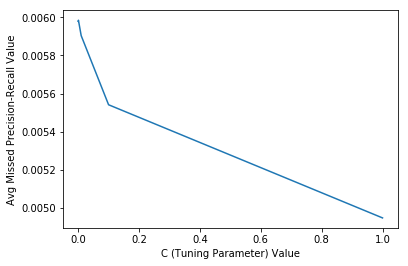

In [21]:
plt.plot(c_values, averaged_missed_precision_recall_scores )
plt.xlabel("C (Tuning Parameter) Value")
plt.ylabel("Avg Missed Precision-Recall Value")
plt.show()

Find the optimal c (tuning parameter) value and use it to build a linear support vector machine model.

In [22]:
min_avg_missed_precision_recall_score = min(averaged_missed_precision_recall_scores)
min_error_index = averaged_missed_precision_recall_scores.index(min_avg_missed_precision_recall_score)
c_value = c_values[min_error_index]

In [23]:
linear_svm_model = SVC(C = c_value, kernel = "linear")
linear_svm_model.fit(X_train, y_train)
y_score = linear_svm_model.decision_function(X_test)
avg_precision_recall_score = average_precision_score(y_test, y_score)
avg_precision_recall_scores[i] += avg_precision_recall_score

/Users/ryanlim/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Specify the linear support vector machine model coefficients and intercept

In [24]:
coefficients = pd.DataFrame({"Features":X.columns,"Coefficients":np.transpose(linear_svm_model.coef_[0])})
coefficients.head(8)

,Features,Coefficients
0,Fresh,-0.001861
1,Milk,0.002976
2,Grocery,0.001329
3,Frozen,-0.009764
4,Detergents_Paper,0.024569
5,Delicassen,0.004162


In [25]:
intercept = pd.DataFrame({"Intercept": linear_svm_model.intercept_})
intercept.head()

,Intercept
0,-80.197733


Specify the minimum cross validation error

In [26]:
print("The minimum average cross validation missed precision-recall score is: " + str(min_avg_missed_precision_recall_score))

The minimum average cross validation missed precision-recall score is: 0.004947229711484813


#### Support Vector Machine With Polynomial Kernel

Perform stratified k-fold cross validation 

In [27]:
avg_precision_recall_scores = [0, 0, 0, 0, 0]
c_values = [0.0001, 0.001, 0.01, 0.1, 1.0]
num_iterations = 0

In [29]:
kf = StratifiedKFold(n_splits = 2) 

for train_index, test_index in kf.split(X,y):
    X_train_indexed, X_test_indexed = X.iloc[train_index, :], X.iloc[test_index, :] 
    y_train_indexed, y_test_indexed = y.iloc[train_index, :], y.iloc[test_index, :]
        
    for i in range(5):
        c_value = c_values[i]
        polynomial_kernel_svm_model = SVC(C = c_value, kernel = "poly")
        polynomial_kernel_svm_model.fit(X_train_indexed, y_train_indexed)
        y_score = polynomial_kernel_svm_model.decision_function(X_test_indexed)
        avg_precision_recall_score = average_precision_score(y_test_indexed, y_score)
        avg_precision_recall_scores[i] += avg_precision_recall_score
        num_iterations += 1 

/Users/ryanlim/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ryanlim/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ryanlim/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ryanlim/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change f

In [31]:
averaged_missed_precision_recall_scores = [(1 - avg_precision_recall_score) / num_iterations for avg_precision_recall_score in avg_precision_recall_scores]

Create a plot of the c (tuning parameter) and average missed precision-recall values

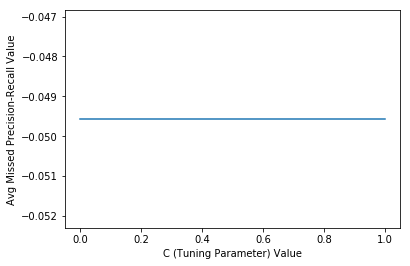

In [32]:
plt.plot(c_values, averaged_missed_precision_recall_scores )
plt.xlabel("C (Tuning Parameter) Value")
plt.ylabel("Avg Missed Precision-Recall Value")
plt.show()

Specify the minimum cross_validation error

In [33]:
min_avg_missed_precision_recall_score = min(averaged_missed_precision_recall_scores)
print(min_avg_missed_precision_recall_score)

-0.049571645366501674


#### Support Vector Machine With Gaussian Kernel

Perform stratified k-fold cross validation 

In [34]:
avg_precision_recall_scores = [0, 0, 0, 0, 0]
c_values = [0.0001, 0.001, 0.01, 0.1, 1.0]
num_iterations = 0

In [35]:
kf = StratifiedKFold(n_splits = 2) 

for train_index, test_index in kf.split(X,y):
    X_train_indexed, X_test_indexed = X.iloc[train_index, :], X.iloc[test_index, :] 
    y_train_indexed, y_test_indexed = y.iloc[train_index, :], y.iloc[test_index, :]
        
    for i in range(5):
        c_value = c_values[i]
        gaussian_kernel_svm_model = SVC(C = c_value, kernel = "rbf", gamma='auto')
        gaussian_kernel_svm_model.fit(X_train_indexed, y_train_indexed)
        y_score = gaussian_kernel_svm_model.decision_function(X_test_indexed)
        avg_precision_recall_score = average_precision_score(y_test_indexed, y_score)
        avg_precision_recall_scores[i] += avg_precision_recall_score
        num_iterations += 1 

/Users/ryanlim/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ryanlim/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ryanlim/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ryanlim/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [36]:
averaged_missed_precision_recall_scores = [(1 - avg_precision_recall_score) / num_iterations for avg_precision_recall_score in avg_precision_recall_scores]

Create a plot of the c (tuning parameter) and average missed precision-recall values

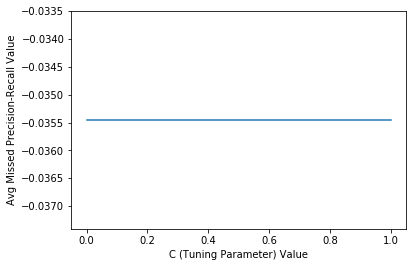

In [37]:
plt.plot(c_values, averaged_missed_precision_recall_scores)
plt.xlabel("C (Tuning Parameter) Value")
plt.ylabel("Avg Missed Precision-Recall Value")
plt.show()

Specify the minimum cross_validation error

In [38]:
min_avg_missed_precision_recall_score = min(averaged_missed_precision_recall_scores)
print(min_avg_missed_precision_recall_score)

-0.03545454545454545
